# **IBM HR Analytics Employee Attrition & Performance**

**About Dataset :**

Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists.

Education :
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'

EnvironmentSatisfaction :
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobInvolvement :
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobSatisfaction :
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

PerformanceRating :
1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'

RelationshipSatisfaction :
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

WorkLifeBalance :
1 'Bad'
2 'Good'
3 'Better'
4 'Best'

**Workflow of the project :**

1. Data Collection

2. EDA(Exploratory Data Analysis):
    *   Data Pre-processing
    *   Data Visualization
    *   Data Analysis

3. Train Test Split

4. Model Building

5. Performing Evaluation Metrics

6. Feature Importance
    



    


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
df = pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.head(30)

Age Attrition     BusinessTravel  DailyRate              Department  \
0    41       Yes      Travel_Rarely       1102                   Sales   
1    49        No  Travel_Frequently        279  Research & Development   
2    37       Yes      Travel_Rarely       1373  Research & Development   
3    33        No  Travel_Frequently       1392  Research & Development   
4    27        No      Travel_Rarely        591  Research & Development   
5    32        No  Travel_Frequently       1005  Research & Development   
6    59        No      Travel_Rarely       1324  Research & Development   
7    30        No      Travel_Rarely       1358  Research & Development   
8    38        No  Travel_Frequently        216  Research & Development   
9    36        No      Travel_Rarely       1299  Research & Development   
10   35        No      Travel_Rarely        809  Research & Development   
11   29        No      Travel_Rarely        153  Research & Development   
12   31        No      Travel_Rarely        670  Research & Development   
13   34        No      Travel_Rarely       1346  Research & Development   
14   28       Yes      Travel_Rarely        103  Research & Development   
15   29        No      Travel_Rarely       1389  Research & Development   
16   32        No      Travel_Rarely        334  Research & Development   
17   22        No         Non-Travel       1123  Research & Development   
18   53        No      Travel_Rarely       1219                   Sales   
19   38        No      Travel_Rarely        371  Research & Development   
20   24        No         Non-Travel        673  Research & Development   
21   36       Yes      Travel_Rarely       1218                   Sales   
22   34        No      Travel_Rarely        419  Research & Development   
23   21        No      Travel_Rarely        391  Research & Development   
24   34       Yes      Travel_Rarely        699  Research & Development   
25   53        No      Travel_Rarely       1282  Research & Development   
26   32       Yes  Travel_Frequently       1125  Research & Development   
27   42        No      Travel_Rarely        691                   Sales   
28   44        No      Travel_Rarely        477  Research & Development   
29   46        No      Travel_Rarely        705                   Sales   

    DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                  1          2  Life Sciences              1               1   
1                  8          1  Life Sciences              1               2   
2                  2          2          Other              1               4   
3                  3          4  Life Sciences              1               5   
4                  2          1        Medical              1               7   
5                  2          2  Life Sciences              1               8   
6                  3          3        Medical              1              10   
7                 24          1  Life Sciences              1              11   
8                 23          3  Life Sciences              1              12   
9                 27          3        Medical              1              13   
10                16          3        Medical              1              14   
11                15          2  Life Sciences              1              15   
12                26          1  Life Sciences              1              16   
13                19          2        Medical              1              18   
14                24          3  Life Sciences              1              19   
15                21          4  Life Sciences              1              20   
16                 5          2  Life Sciences              1              21   
17                16          2        Medical              1              22   
18                 2          4  Life Sciences              1              23   
19                 2          3  Life Sciences            

In [ ]:
object_columns = df.select_dtypes(include=['object']).columns

for column in object_columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in Attrition: ['Yes' 'No']
Unique values in BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Unique values in Department: ['Sales' 'Research & Development' 'Human Resources']
Unique values in EducationField: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Unique values in Gender: ['Female' 'Male']
Unique values in JobRole: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
Unique values in MaritalStatus: ['Single' 'Married' 'Divorced']
Unique values in Over18: ['Y']
Unique values in OverTime: ['Yes' 'No']


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
one_hot_encoder = OneHotEncoder()
label_encoded_columns = {}
one_hot_encoded_columns = {}
binary_categorical_columns = ['Attrition', 'Gender', 'OverTime']

for column in binary_categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])
    label_encoded_columns[column] = label_encoder.classes_
categorical_columns = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']

for column in categorical_columns:
    encoded_data = one_hot_encoder.fit_transform(df[[column]])
    encoded_df = pd.DataFrame(encoded_data.toarray(), columns=one_hot_encoder.get_feature_names_out([column]))
    df = pd.concat([df, encoded_df], axis=1)
    one_hot_encoded_columns[column] = one_hot_encoder.categories_

df.drop(categorical_columns, axis=1, inplace=True)

print("Label Encoded Columns:")
print(label_encoded_columns)
print("\nOne-Hot Encoded Columns:")
print(one_hot_encoded_columns)


Label Encoded Columns:
{'Attrition': array(['No', 'Yes'], dtype=object), 'Gender': array(['Female', 'Male'], dtype=object), 'OverTime': array(['No', 'Yes'], dtype=object)}

One-Hot Encoded Columns:
{'BusinessTravel': [array(['Non-Travel', 'Travel_Frequently', 'Travel_Rarely'], dtype=object)], 'Department': [array(['Human Resources', 'Research & Development', 'Sales'], dtype=object)], 'EducationField': [array(['Human Resources', 'Life Sciences', 'Marketing', 'Medical',
       'Other', 'Technical Degree'], dtype=object)], 'JobRole': [array(['Healthcare Representative', 'Human Resources',
       'Laboratory Technician', 'Manager', 'Manufacturing Director',
       'Research Director', 'Research Scientist', 'Sales Executive',
       'Sales Representative'], dtype=object)], 'MaritalStatus': [array(['Divorced', 'Married', 'Single'], dtype=object)]}


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 54 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   int64  
 1   Attrition                          1470 non-null   int64  
 2   DailyRate                          1470 non-null   int64  
 3   DistanceFromHome                   1470 non-null   int64  
 4   Education                          1470 non-null   int64  
 5   EmployeeCount                      1470 non-null   int64  
 6   EmployeeNumber                     1470 non-null   int64  
 7   EnvironmentSatisfaction            1470 non-null   int64  
 8   Gender                             1470 non-null   int64  
 9   HourlyRate                         1470 non-null   int64  
 10  JobInvolvement                     1470 non-null   int64  
 11  JobLevel                           1470 non-null   int64

In [ ]:
df.drop(columns=['Over18'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 53 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   int64  
 1   Attrition                          1470 non-null   int64  
 2   DailyRate                          1470 non-null   int64  
 3   DistanceFromHome                   1470 non-null   int64  
 4   Education                          1470 non-null   int64  
 5   EmployeeCount                      1470 non-null   int64  
 6   EmployeeNumber                     1470 non-null   int64  
 7   EnvironmentSatisfaction            1470 non-null   int64  
 8   Gender                             1470 non-null   int64  
 9   HourlyRate                         1470 non-null   int64  
 10  JobInvolvement                     1470 non-null   int64  
 11  JobLevel                           1470 non-null   int64

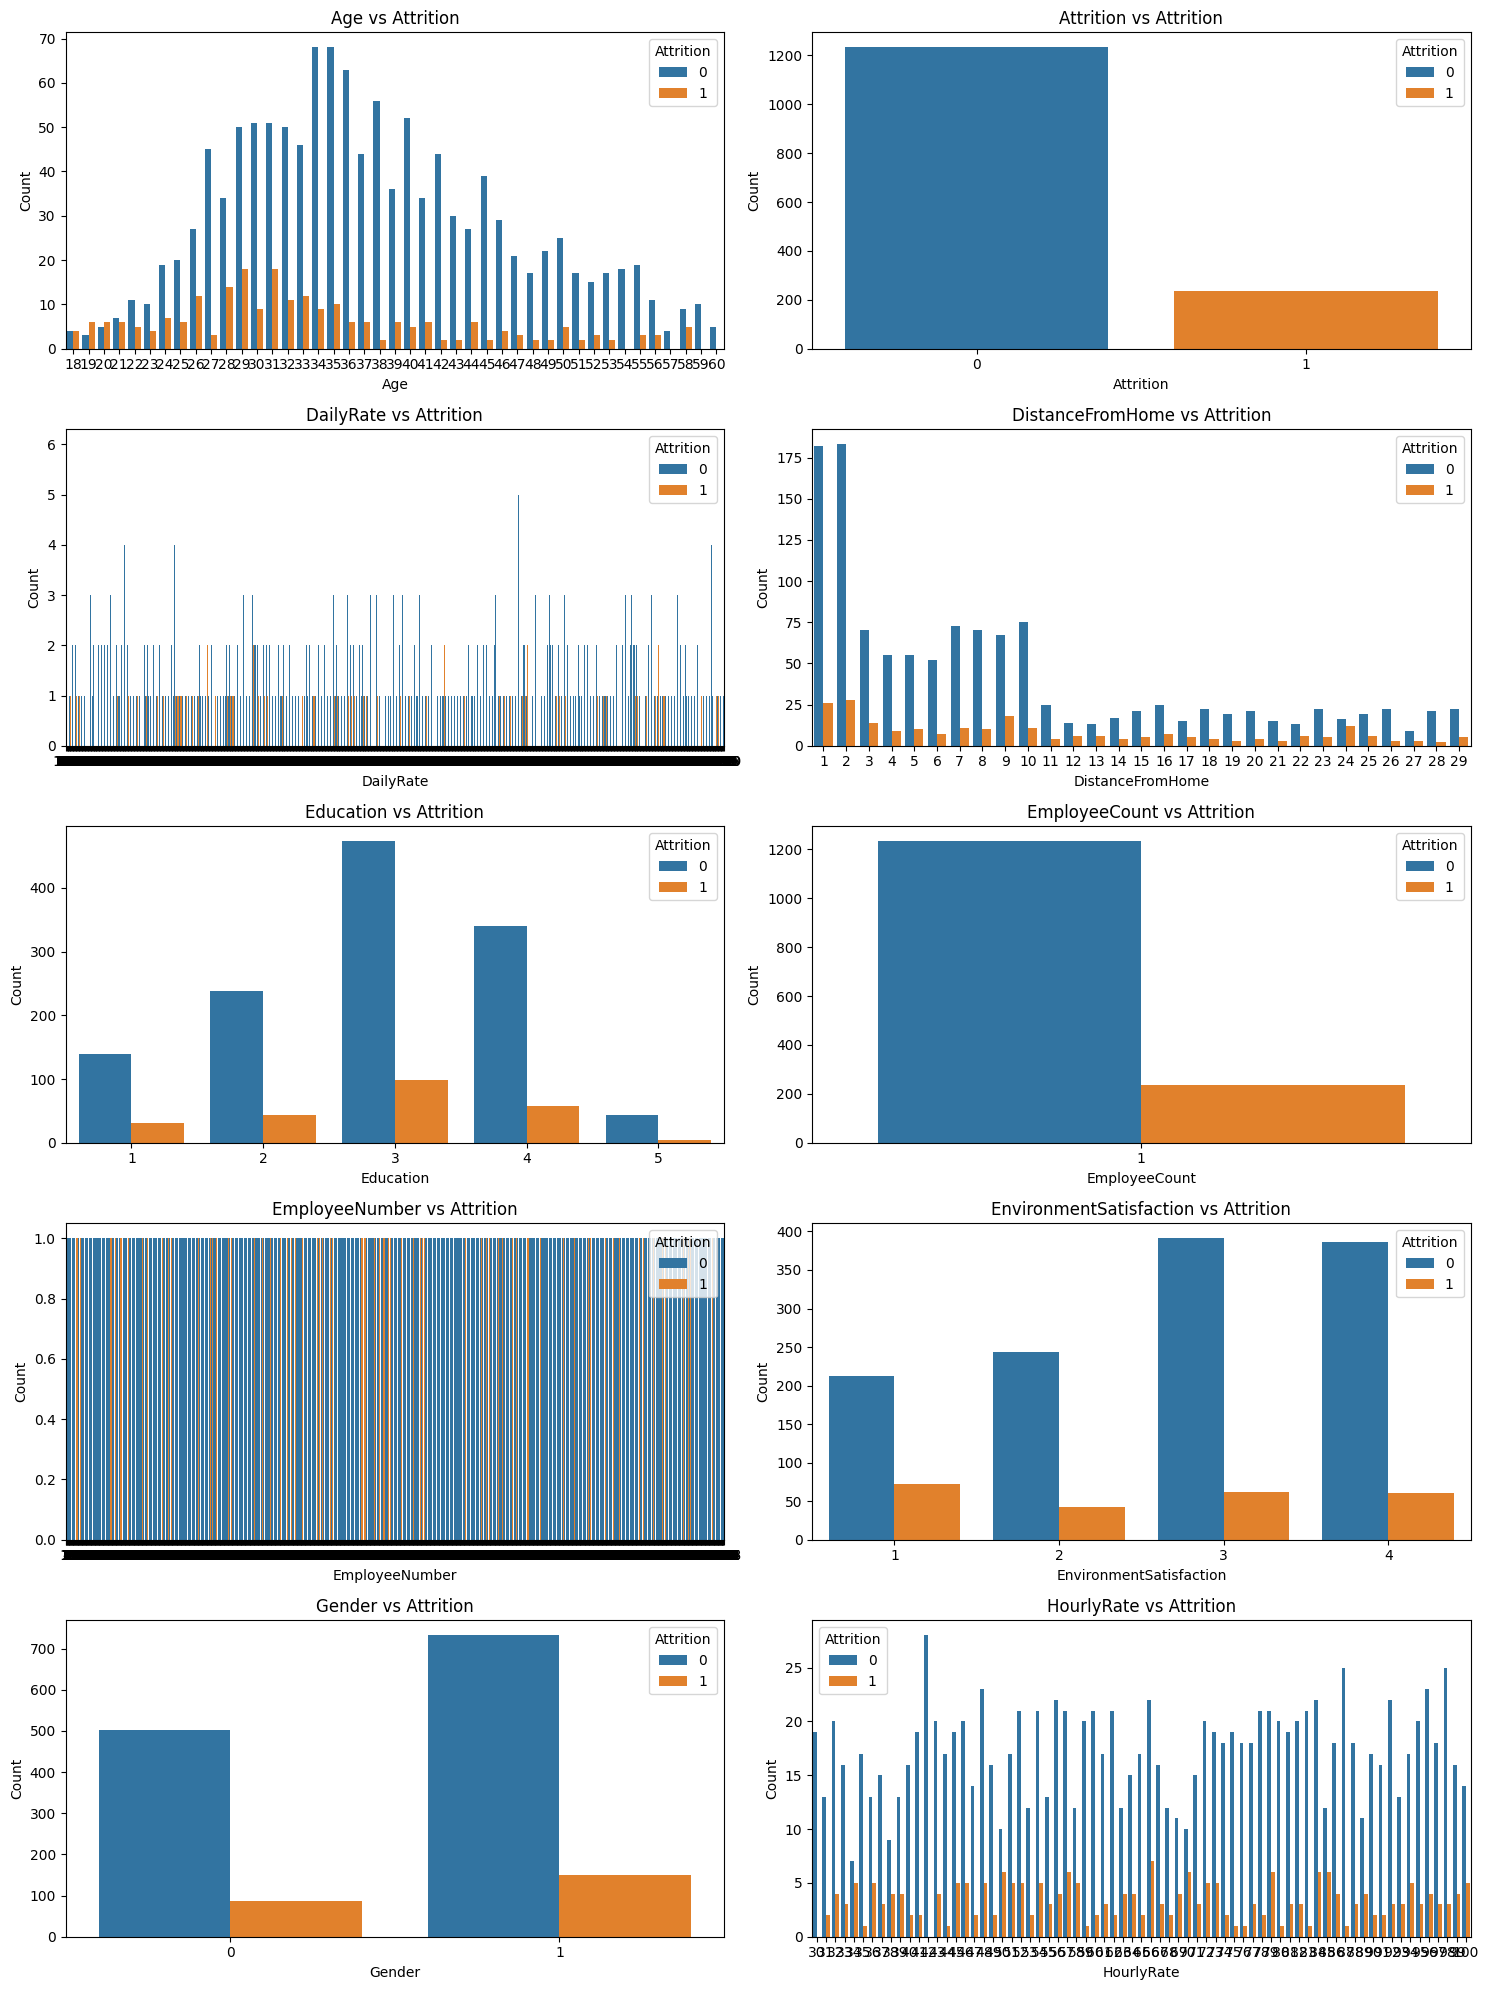

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting the first 10 columns for visualization
columns_to_visualize = df.columns[:10]

# Setting up the plot grid
num_rows = 5
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))

# Looping over columns and plotting
for i, column in enumerate(columns_to_visualize):
    row = i // num_cols
    col = i % num_cols
    sns.countplot(x=column, hue='Attrition', data=df, ax=axes[row, col])
    axes[row, col].set_title(f'{column} vs Attrition')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Count')

# Adjusting layout
plt.tight_layout()
plt.show()

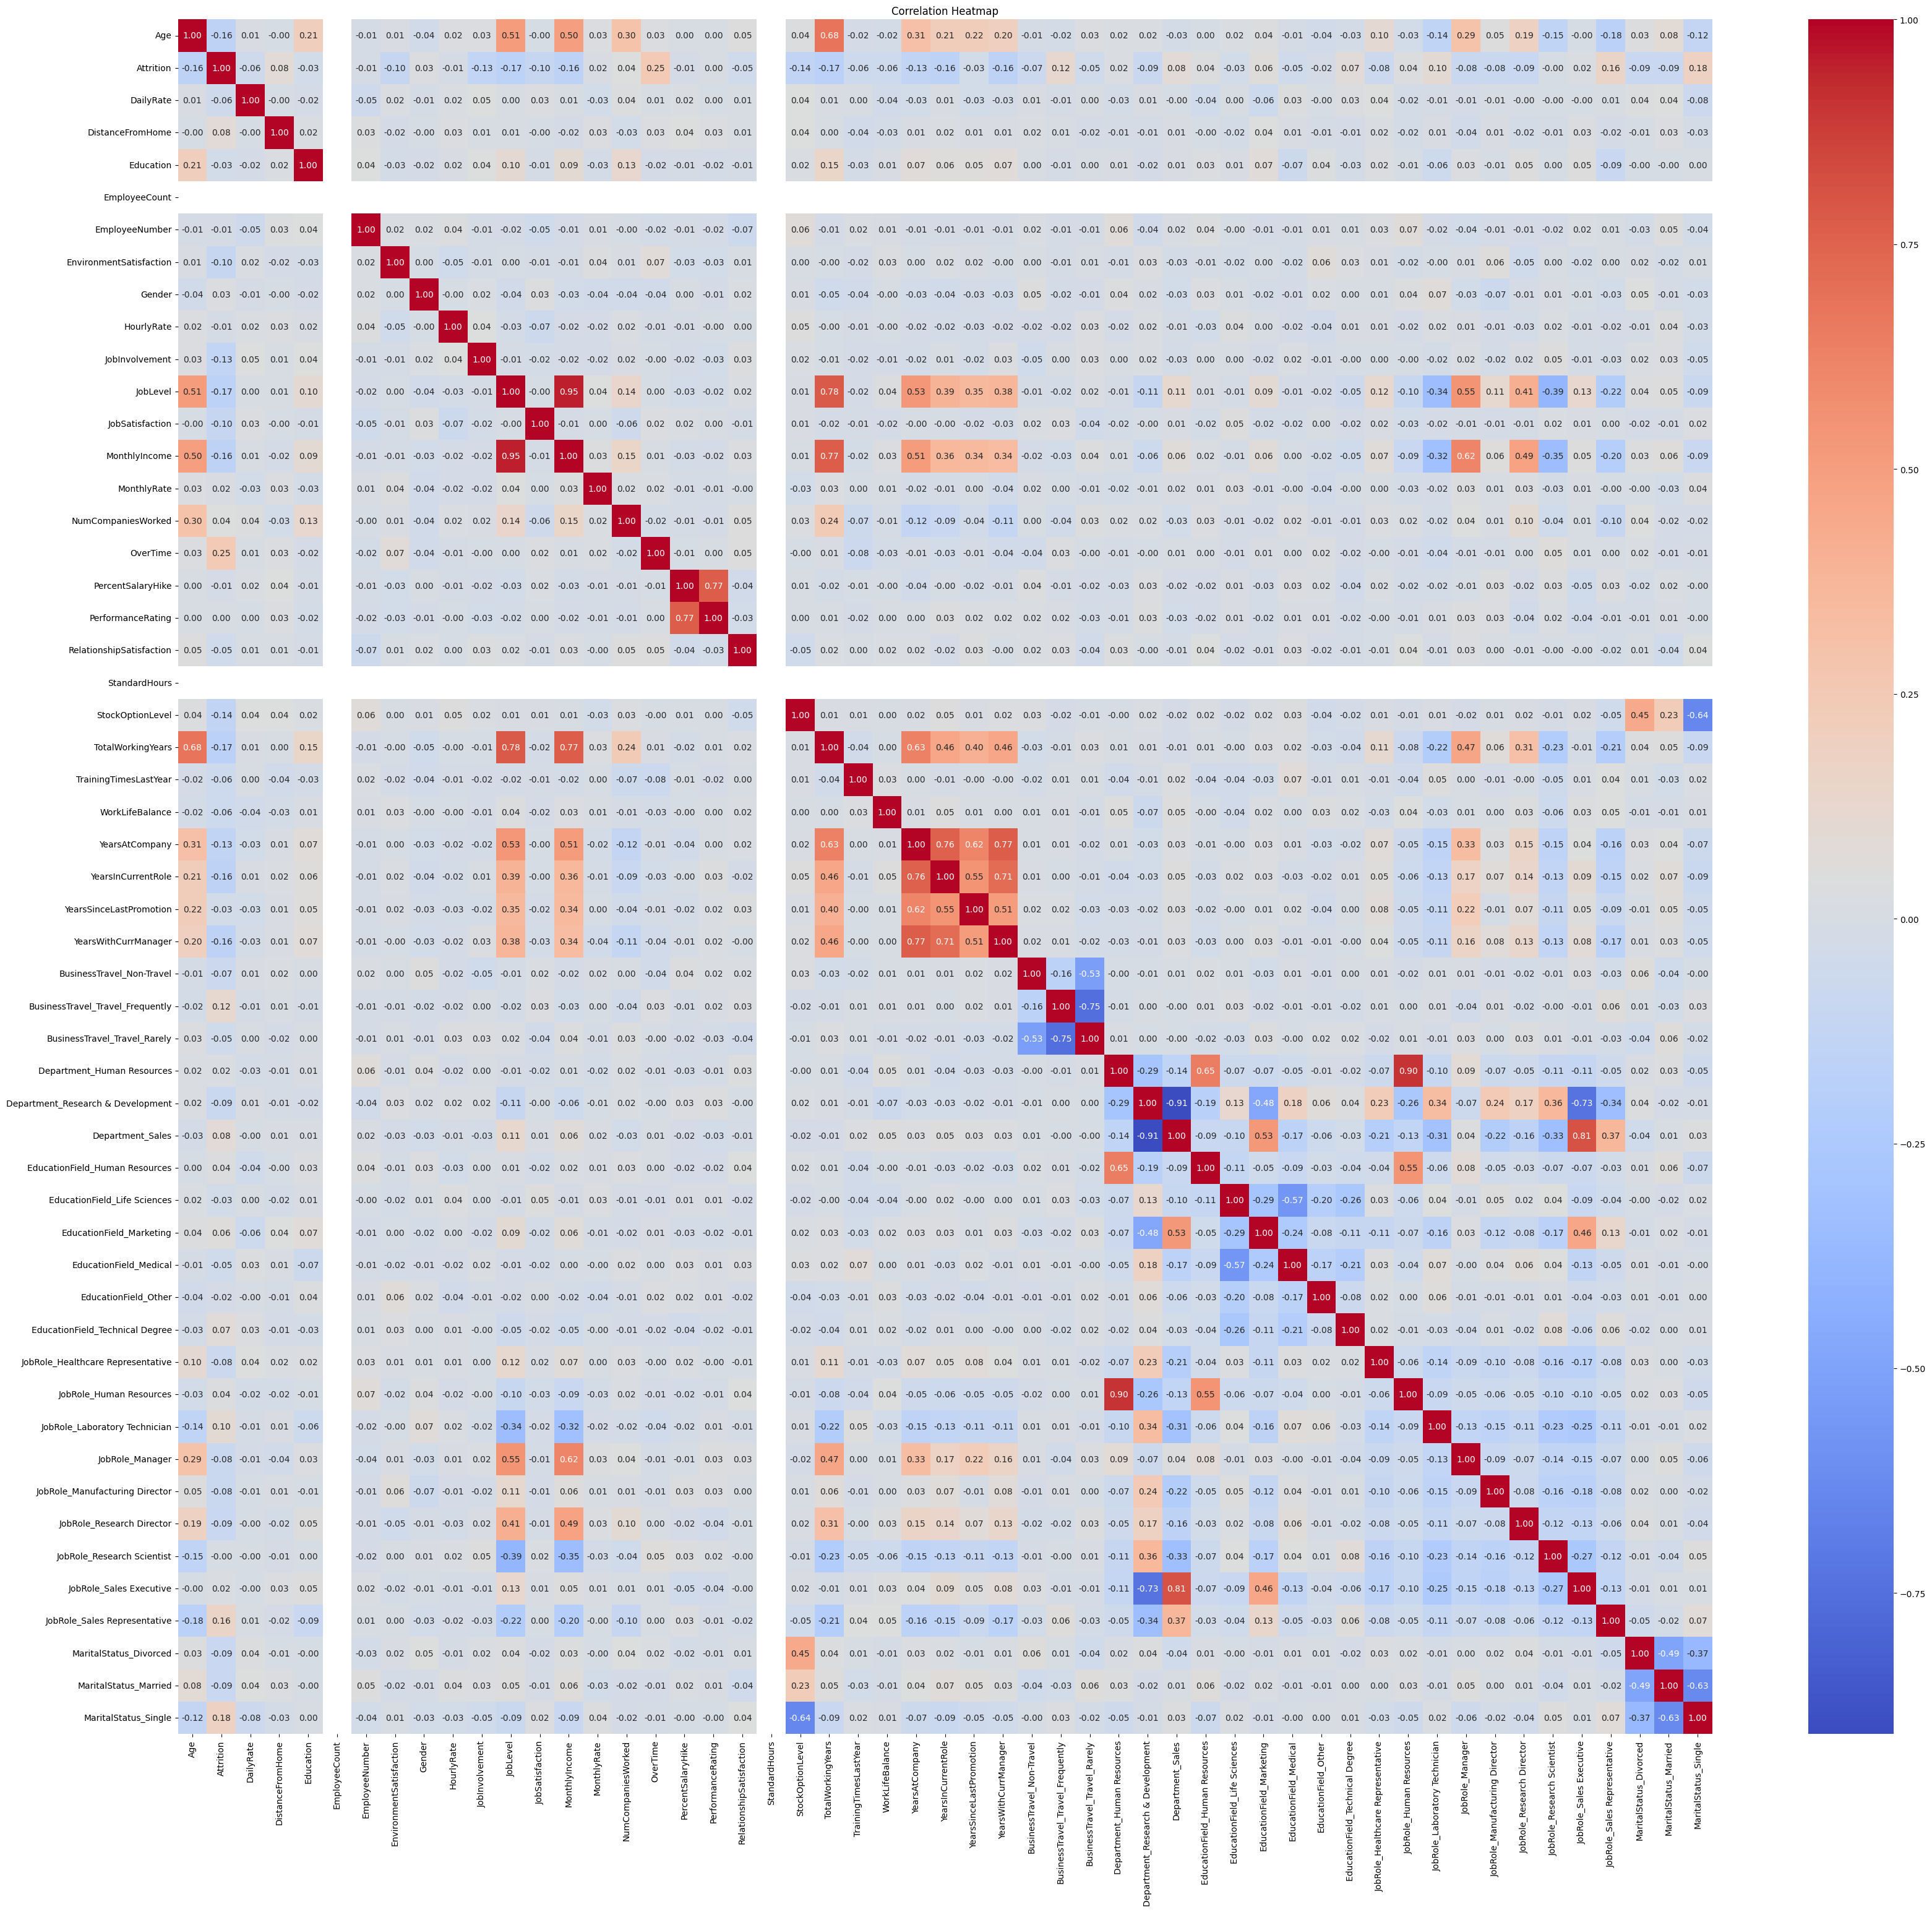

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df.corr()

# Generate a heatmap
plt.figure(figsize=(40, 36))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


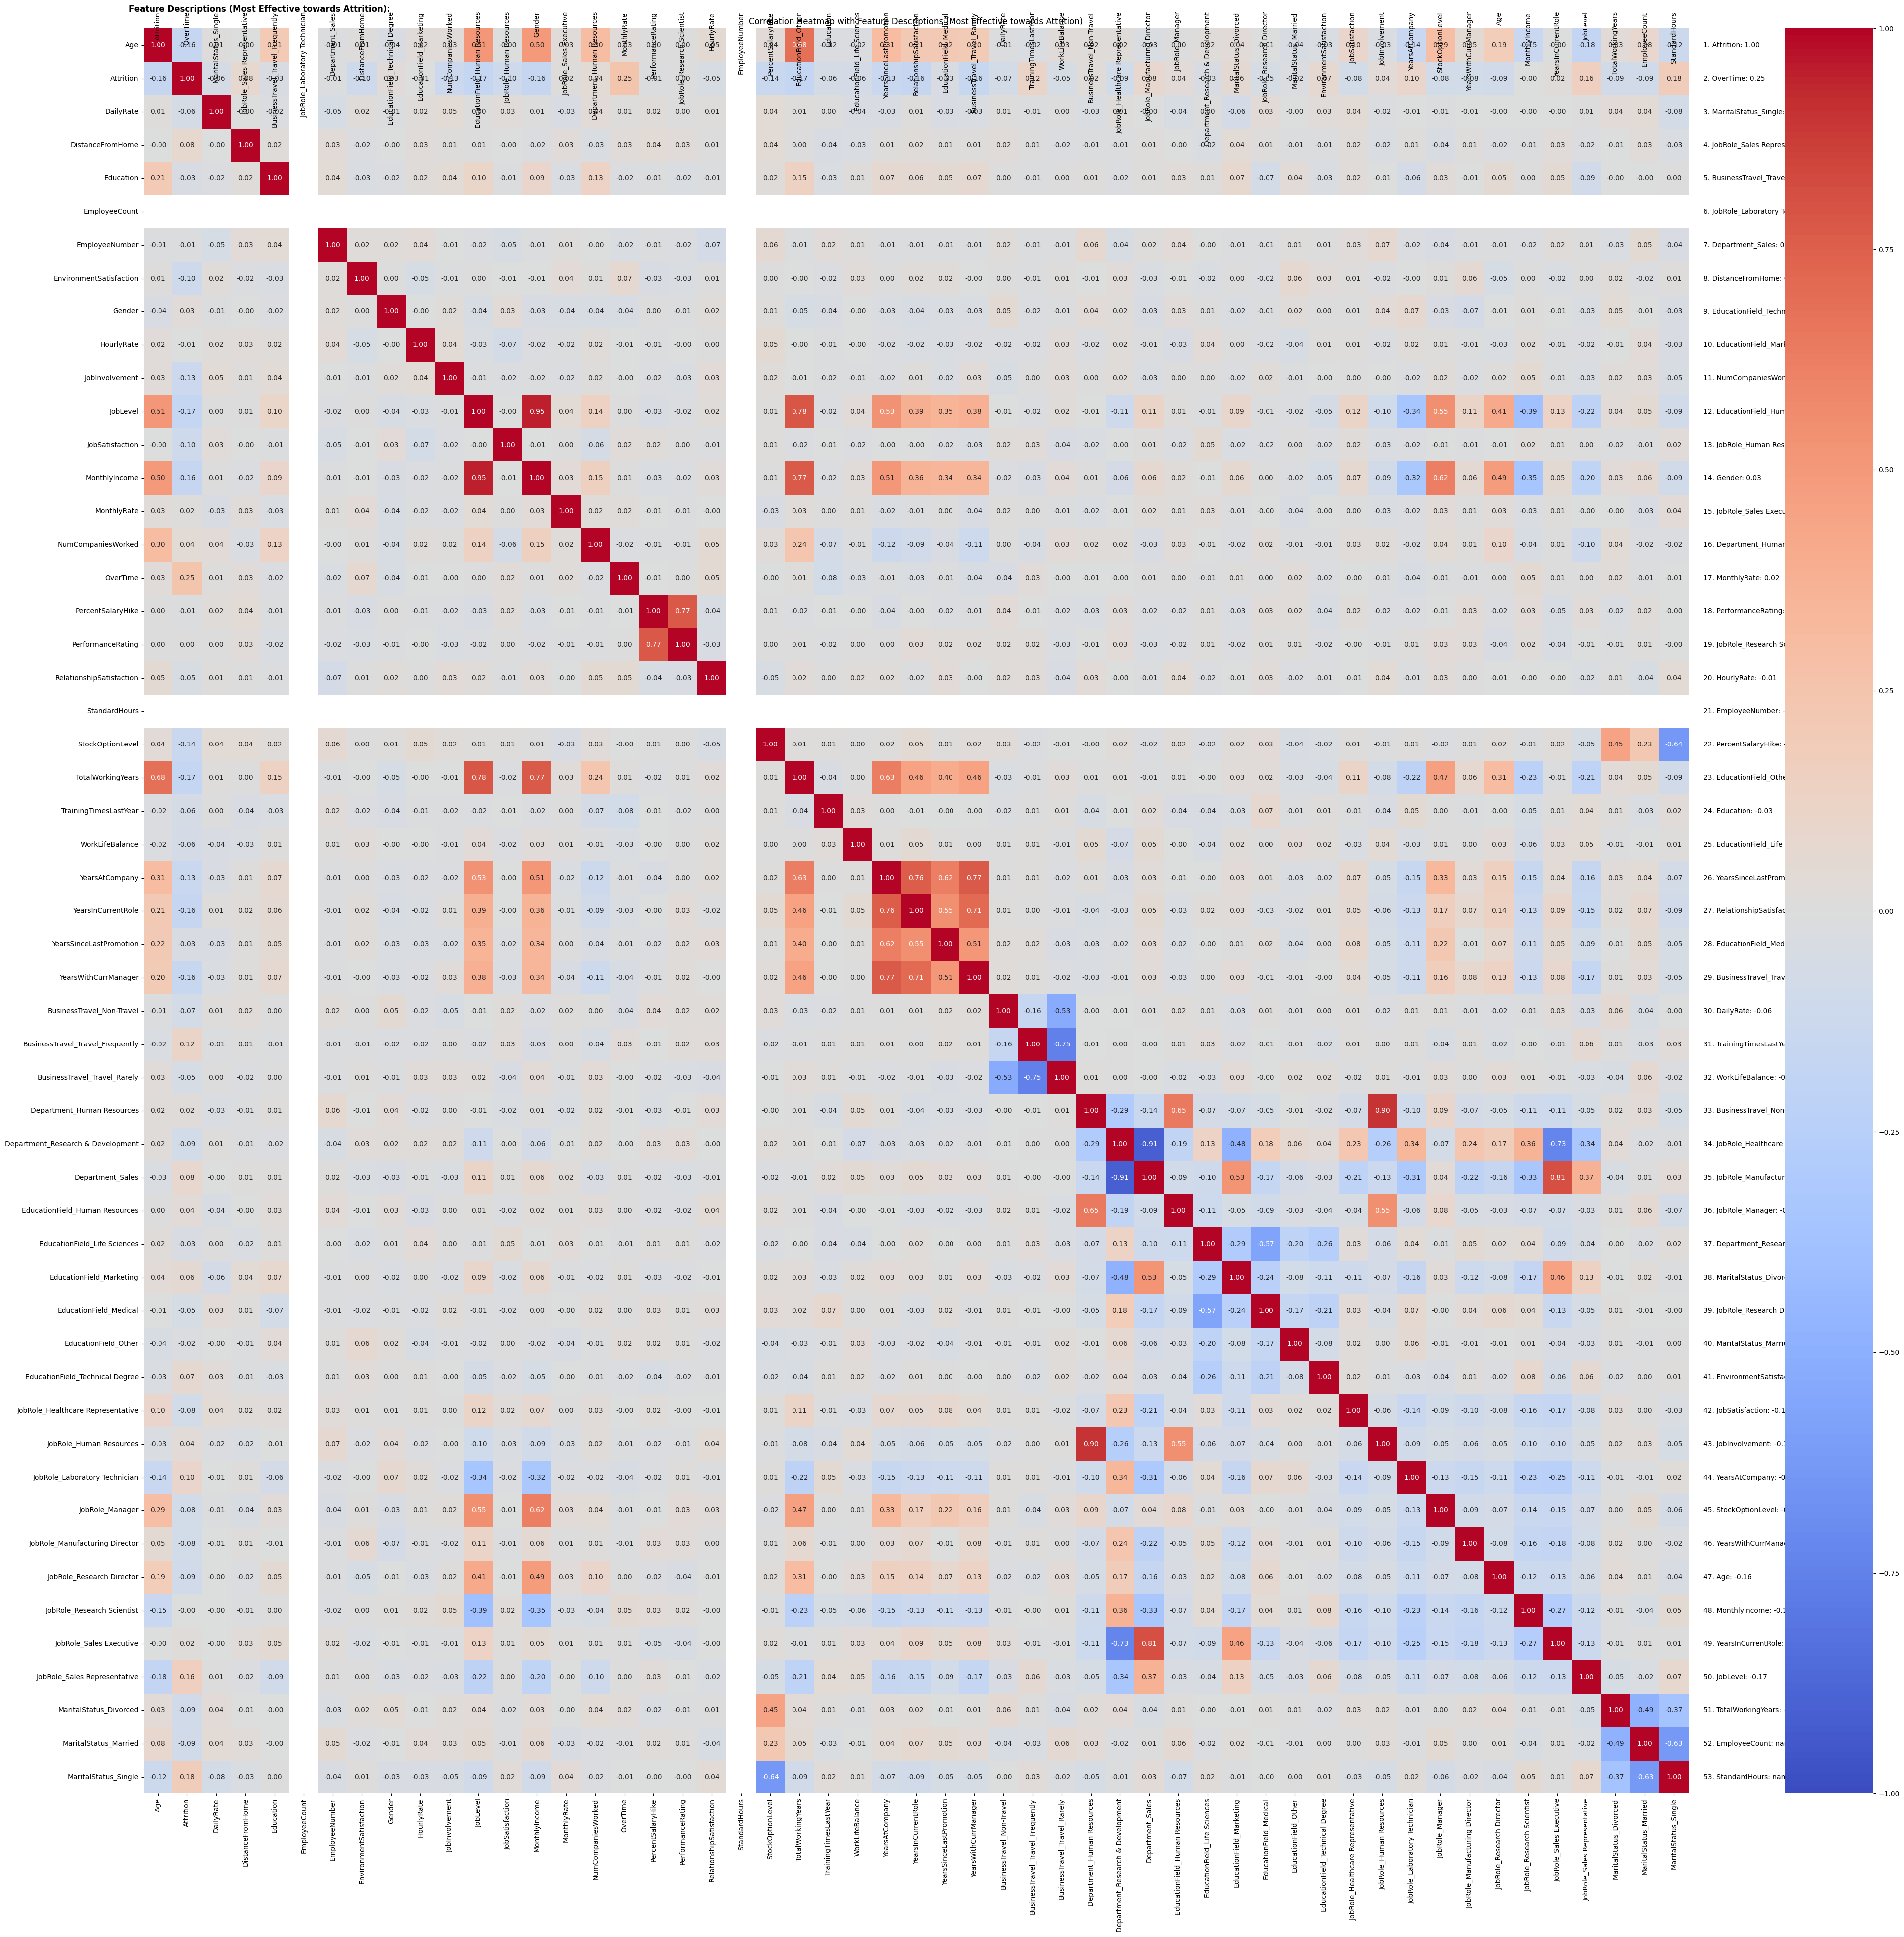

In [ ]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(50, 46))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Annotate the heatmap with feature explanations
plt.text(-0.5, -0.5, 'Feature Explanations:', fontsize=12, fontweight='bold', ha='left')
for i, feature in enumerate(correlation_matrix.index):
    plt.text(len(correlation_matrix.columns) + 0.5, i + 0.5, feature, fontsize=10, ha='left', va='center')
    plt.text(i + 0.5, -0.5, feature, fontsize=10, rotation=90, ha='center', va='top')

plt.title('Correlation Heatmap with Feature Explanations')
plt.show()

In [ ]:
att_counts = df['Attrition'].value_counts()
print(att_counts)

Attrition
0    1233
1     237
Name: count, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Assuming your dataframe is named 'df' and the target variable is 'Attrition'
X = df.drop('Attrition', axis=1)  # Features
y = df['Attrition']  # Target variable

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to generate synthetic samples
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert the resampled data back to a DataFrame (if needed)
resampled_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame({'Attrition': y_resampled})], axis=1)

# Check the class distribution after SMOTE
print(resampled_df['Attrition'].value_counts())


Attrition
1    1233
0    1233
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
scaler = StandardScaler()

# Apply scaling to the resampled features
X_resampled_scaled = scaler.fit_transform(X_resampled)z

# Convert the scaled data back to a DataFrame (if needed)
resampled_df_scaled = pd.DataFrame(X_resampled_scaled, columns=X.columns)

# Check the scaled feature distribution
print(resampled_df_scaled.describe())


                Age     DailyRate  DistanceFromHome     Education  \
count  2.466000e+03  2.466000e+03      2.466000e+03  2.466000e+03   
mean   3.342375e-16 -6.338986e-17     -9.220344e-17 -1.267797e-16   
std    1.000203e+00  1.000203e+00      1.000203e+00  1.000203e+00   
min   -1.935127e+00 -1.799129e+00     -1.134463e+00 -1.783983e+00   
25%   -7.140076e-01 -8.280357e-01     -8.753673e-01 -7.596984e-01   
50%   -1.589535e-01 -5.804098e-02     -2.276281e-01  2.645861e-01   
75%    6.181223e-01  8.336711e-01      6.792069e-01  2.645861e-01   
max    2.727328e+00  1.897375e+00      2.492877e+00  2.313155e+00   

       EmployeeCount  EmployeeNumber  EnvironmentSatisfaction       Gender  \
count         2466.0    2.466000e+03             2.466000e+03  2466.000000   
mean             0.0   -4.610172e-17             4.610172e-17     0.000000   
std              0.0    1.000203e+00             1.000203e+00     1.000203   
min              0.0   -1.831056e+00            -1.383367e+00    -

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 9.9 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
classifiers = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=False)
}

results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = clf.score(X_test, y_test)
    report = classification_report(y_test, y_pred)
    results[name] = {'accuracy': accuracy, 'classification_report': report}


for name, result in results.items():
    print(f"{name} Classifier:")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print("Classification Report:")
    print(result['classification_report'])
    print("-----------------------------------------------------")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 989, number of negative: 983
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001099 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4127
[LightGBM] [Info] Number of data points in the train set: 1972, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501521 -> initscore=0.006085
[LightGBM] [Info] Start training from score 0.006085
RandomForest Classifier:
Accuracy: 0.9312
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.94       250
           1       0.98      0.88      0.93       244

    accuracy                           0.93       494
   macro avg       0.94      0.93      0.93       494
weighted avg       0.94      0.9

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 989, number of negative: 983
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006527 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4127
[LightGBM] [Info] Number of data points in the train set: 1972, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501521 -> initscore=0.006085
[LightGBM] [Info] Start training from score 0.006085


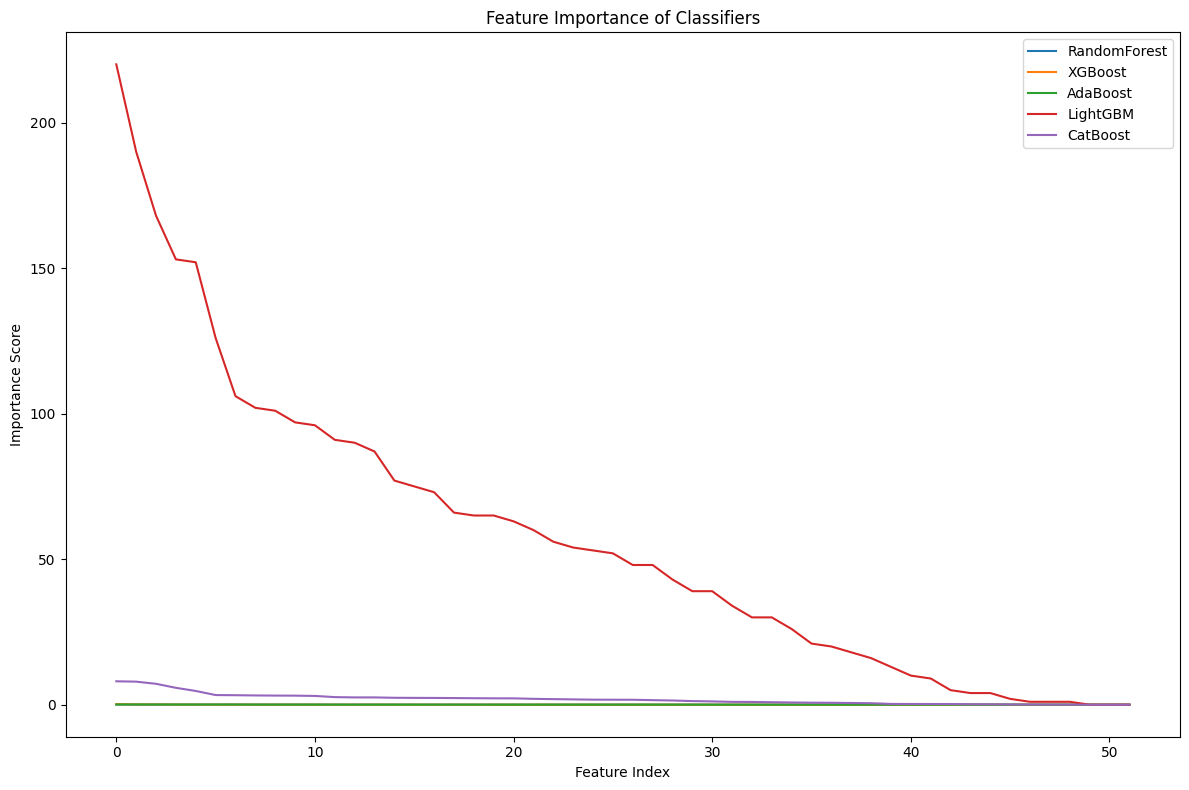

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


classifiers = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=False)
}

feature_importances = {}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    if name == 'XGBoost':
        importances = clf.feature_importances_
    elif name == 'CatBoost':
        importances = clf.get_feature_importance()
    else:
        importances = clf.feature_importances_
    feature_importances[name] = importances

fig, ax = plt.subplots(figsize=(12, 8))

for name, importances in feature_importances.items():
    sorted_indices = np.argsort(importances)[::-1]
    sorted_importances = importances[sorted_indices]
    sorted_columns = X.columns[sorted_indices]
    ax.plot(sorted_importances, label=name)

ax.set_title('Feature Importance of Classifiers')
ax.set_xlabel('Feature Index')
ax.set_ylabel('Importance Score')
ax.legend()

plt.tight_layout()
plt.show()


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 989, number of negative: 983
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001713 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4127
[LightGBM] [Info] Number of data points in the train set: 1972, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501521 -> initscore=0.006085
[LightGBM] [Info] Start training from score 0.006085


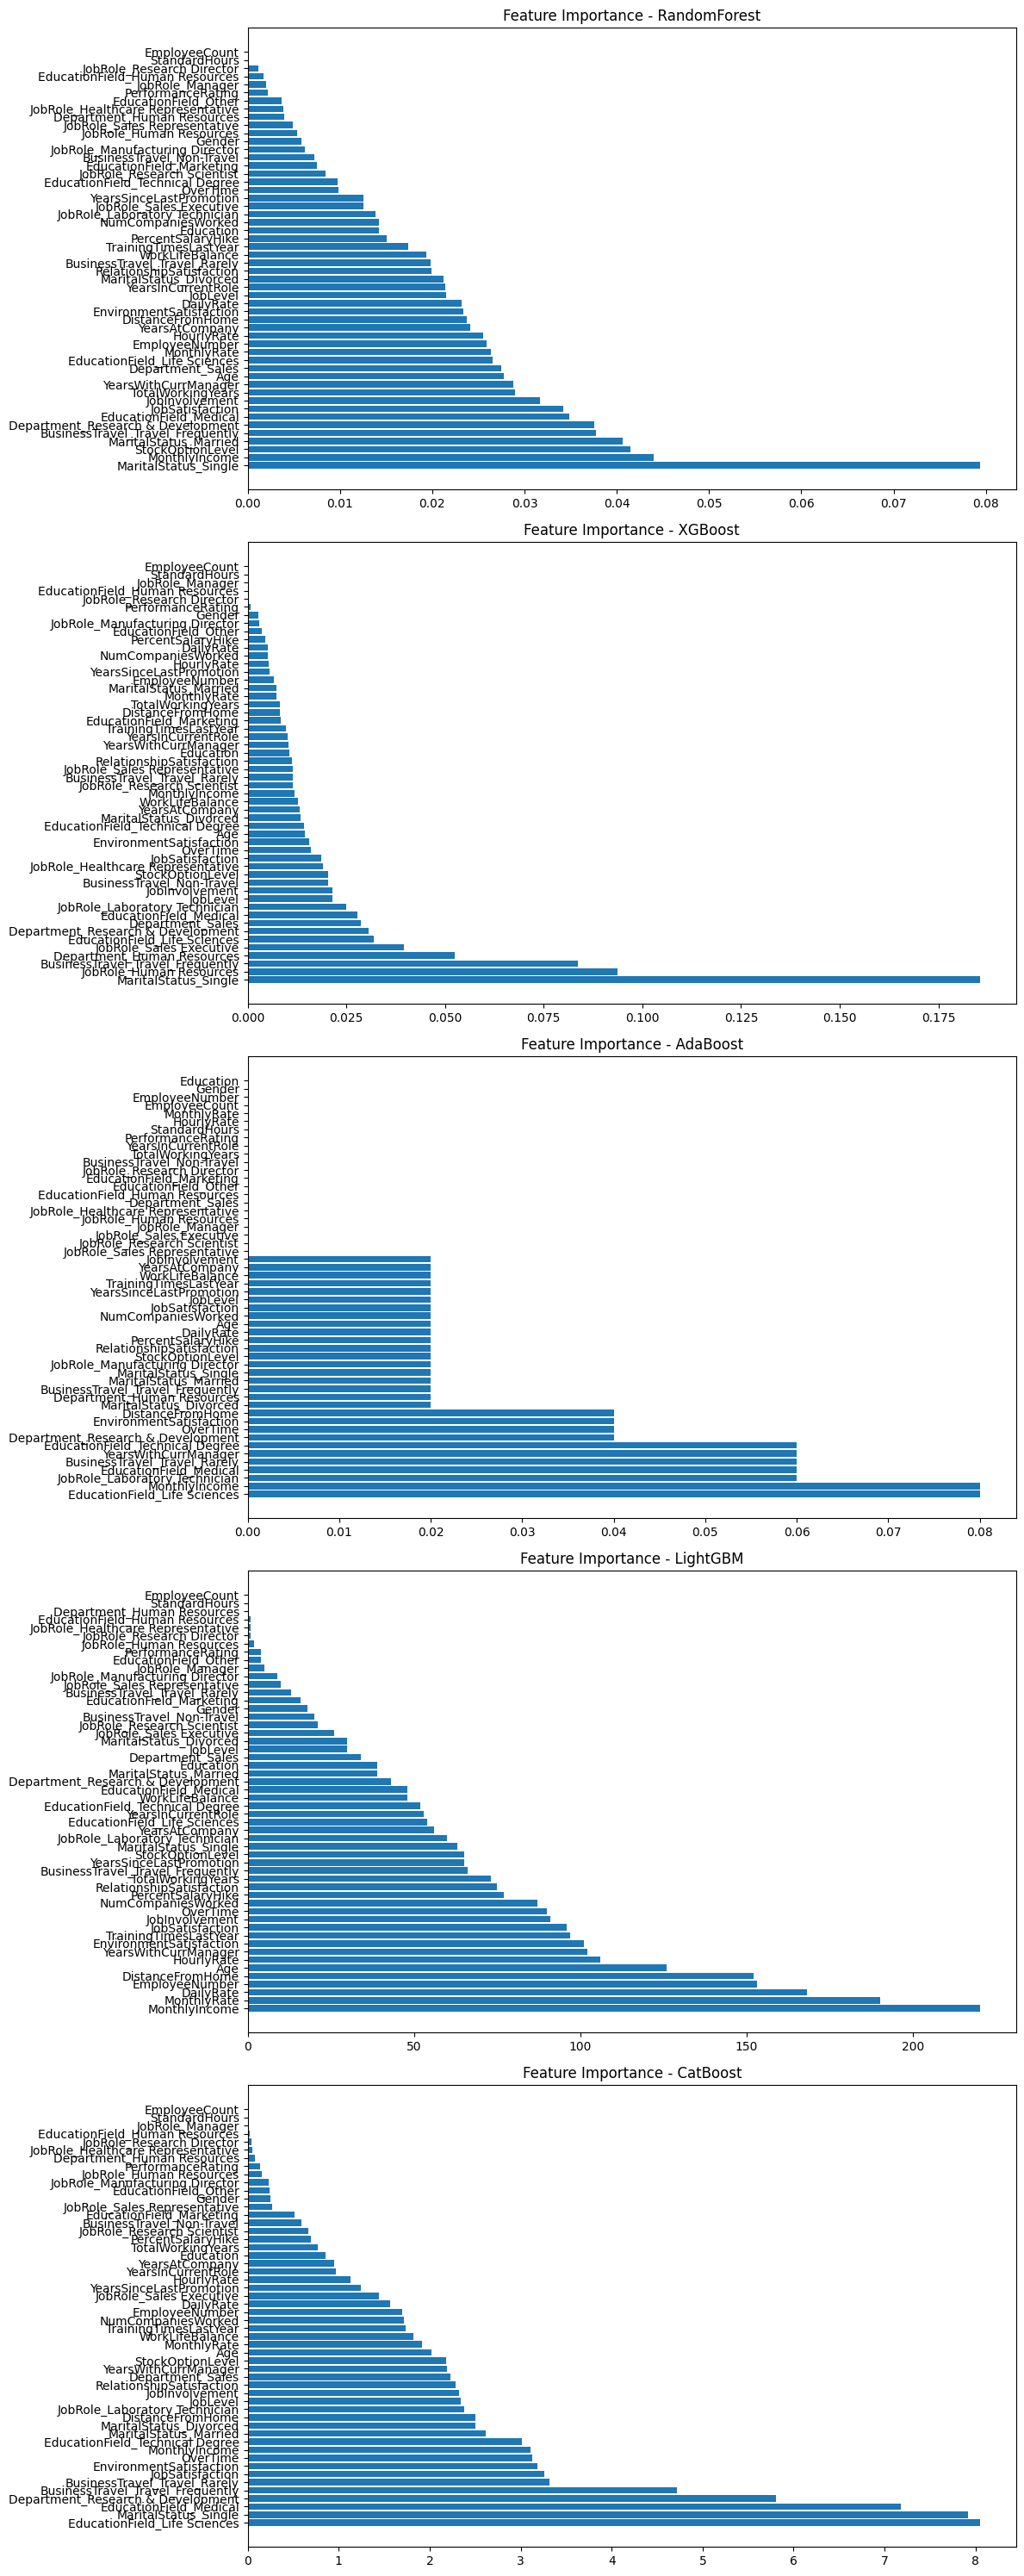

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Train classifiers
classifiers = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'CatBoost': CatBoostClassifier(random_state=42, verbose=False)
}

feature_importances = {}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    if name == 'XGBoost':
        importances = clf.feature_importances_
    elif name == 'CatBoost':
        importances = clf.get_feature_importance()
    else:
        importances = clf.feature_importances_
    feature_importances[name] = importances

# Plot feature importance for every feature for every model
fig, axes = plt.subplots(nrows=len(classifiers), ncols=1, figsize=(12, 6*len(classifiers)))

for ax, (name, importances) in zip(axes.flat, feature_importances.items()):
    sorted_indices = np.argsort(importances)[::-1]
    sorted_importances = importances[sorted_indices]
    sorted_columns = X.columns[sorted_indices]
    ax.barh(range(len(importances)), sorted_importances, tick_label=sorted_columns)
    ax.set_title(f'Feature Importance - {name}')
    ax.tick_params(axis='y', rotation=0)  # Rotate y-axis labels for better readability

plt.tight_layout()
plt.show()




In [ ]:

top_n = 10

for name, importances in feature_importances.items():
    sorted_indices = np.argsort(importances)[::-1]
    sorted_importances = importances[sorted_indices]
    sorted_columns = X.columns[sorted_indices]

    print(f"Top {top_n} features for {name}:")
    for i in range(top_n):
        print(f"{sorted_columns[i]}: {sorted_importances[i]:.4f}")
    print("---------------------------------------")


Top 10 features for RandomForest:
MaritalStatus_Single: 0.0793
MonthlyIncome: 0.0440
StockOptionLevel: 0.0414
MaritalStatus_Married: 0.0406
BusinessTravel_Travel_Frequently: 0.0378
Department_Research & Development: 0.0376
EducationField_Medical: 0.0349
JobSatisfaction: 0.0342
JobInvolvement: 0.0317
TotalWorkingYears: 0.0289
---------------------------------------
Top 10 features for XGBoost:
MaritalStatus_Single: 0.1855
JobRole_Human Resources: 0.0936
BusinessTravel_Travel_Frequently: 0.0836
Department_Human Resources: 0.0525
JobRole_Sales Executive: 0.0395
EducationField_Life Sciences: 0.0320
Department_Research & Development: 0.0306
Department_Sales: 0.0287
EducationField_Medical: 0.0278
JobRole_Laboratory Technician: 0.0251
---------------------------------------
Top 10 features for AdaBoost:
EducationField_Life Sciences: 0.0800
MonthlyIncome: 0.0800
JobRole_Laboratory Technician: 0.0600
EducationField_Medical: 0.0600
BusinessTravel_Travel_Rarely: 0.0600
YearsWithCurrManager: 0.060